# Aanvullende experimenten

Aan het einde van mijn stage heb ik nog een aantal aanvullende experimenten uitgevoerd. Dit valt dus niet onder het onderzoek van mijn afstuderen, maar betreffen zaken waar vanuit het beeldherkenningsteam vragen over kwamen.

In [1]:
from mmengine import Config
cfg = Config.fromfile('../configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-2x_coco.py')

In [11]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
    'classes': ('Zonnepaneel', ),
    'palette': [(220, 20, 60),]
}

# Modify dataset type and path
cfg.data_root = 'Data_samengevoegd'

cfg.train_dataloader.dataset.ann_file = 'train/annotations.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'validation/annotations.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'validation/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.test_dataloader.dataset.ann_file = 'test_alles/annotations.json'
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix.img = 'test_alles/'
cfg.test_dataloader.dataset.metainfo = cfg.metainfo

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/validation/annotations.json'
cfg.test_evaluator.ann_file = cfg.data_root+'/test_alles/annotations.json'

# Modify num classes of the model in bbox head and mask head
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './Aanvullend_1'

# Set the evaluation and checkpoint interval 
cfg.train_cfg.val_interval = 3
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10

# Set seed thus the results are more reproducible
set_random_seed(0, deterministic=False)

cfg.visualizer.vis_backends = [
        dict(type='LocalVisBackend')]

#------------------------------------------------------
config=f'../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-2x_zonnepaneel_combi.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

In [4]:
!python ../tools/train.py {config}

06/13 07:54:14 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1800121474
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
    PyTorch: 2.1.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compu

Validation mAP:  [0.228, 0.238, 0.253, 0.22, 0.259, 0.286, 0.285, 0.285]


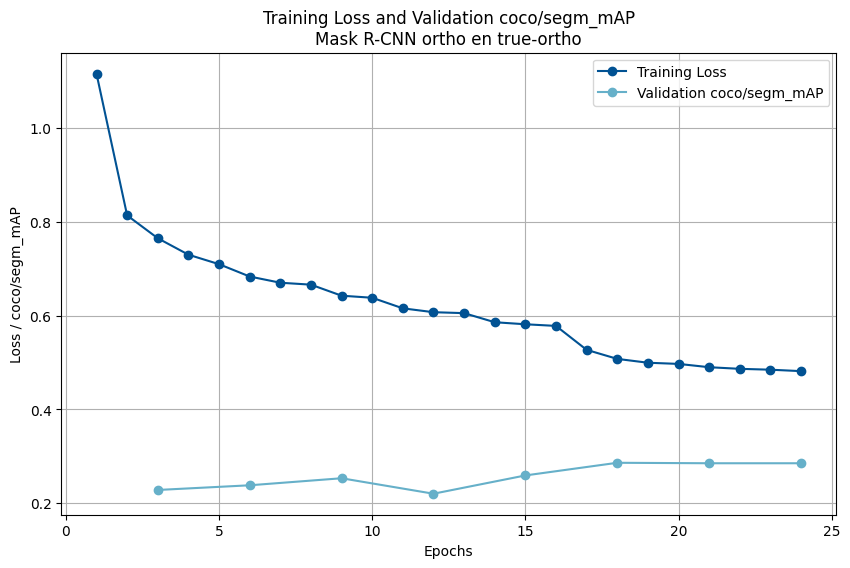

In [5]:
from custom_traininglog_plot import make_train_validation_plot

make_train_validation_plot("Aanvullend_1/20240613_075414/vis_data/20240613_075414.json", "Mask R-CNN ortho en true-ortho")

In [12]:
!python ../tools/test.py \
../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-2x_zonnepaneel_combi.py \
Aanvullend_1/epoch_18.pth \
--work-dir Aanvullend_1/detection_results \
--out results_aanv1_alles.pkl

06/13 12:12:54 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1272863596
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
    PyTorch: 2.1.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compu

In [1]:
!python ../tools/analysis_tools/calculate_segm_metrics.py \
../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-2x_zonnepaneel_combi.py \
results_aanv1_alles.pkl \
Aanvullend_1 \
--show

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 651/651, 0.1 task/s, elapsed: 4782s, ETA:     0sFigure(720x720)


## True-ortho model testen op ortho

In [4]:
from mmengine import Config
cfg = Config.fromfile('../configs/solar_panels/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_true-ortho.py')

In [5]:
from mmengine.runner import set_random_seed

# Modify test dataset
cfg.data_root = 'Data_samengevoegd'

cfg.test_dataloader.dataset.ann_file = 'test_ortho/annotations.json'
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix.img = 'test_ortho/'
cfg.test_dataloader.dataset.metainfo = cfg.metainfo

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/validation/annotations.json'
cfg.test_evaluator.ann_file = cfg.data_root+'/test_ortho/annotations.json'

# Set up working dir to save files and logs.
cfg.work_dir = './Aanvullend_1'

#------------------------------------------------------
config=f'../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_true-ortho.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

In [6]:
!python ../tools/test.py \
../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_true-ortho.py \
Exp_3/epoch_18.pth \
--work-dir Aanvullend_1/detection_results \
--out results_aanv1_o_images_to_model.pkl

06/17 06:36:39 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 486053177
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
    PyTorch: 2.1.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=comput

In [7]:
!python ../tools/analysis_tools/calculate_segm_metrics.py \
../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_true-ortho.py \
results_aanv1_o_images_to_model.pkl \
Aanvullend_1 \
--show

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 369/369, 0.2 task/s, elapsed: 1740s, ETA:     0sFigure(720x720)


## Ortho model testen op true-ortho

In [8]:
from mmengine import Config
cfg = Config.fromfile('../configs/solar_panels/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_ortho_2.py')

In [9]:
from mmengine.runner import set_random_seed

# Modify test dataset
cfg.data_root = 'Data_samengevoegd'

cfg.test_dataloader.dataset.ann_file = 'test_true_ortho/annotations.json'
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix.img = 'test_true_ortho/'
cfg.test_dataloader.dataset.metainfo = cfg.metainfo

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/validation/annotations.json'
cfg.test_evaluator.ann_file = cfg.data_root+'/test_true_ortho/annotations.json'

# Set up working dir to save files and logs.
cfg.work_dir = './Aanvullend_1'

#------------------------------------------------------
config=f'../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_ortho.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

In [10]:
!python ../tools/test.py \
../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_ortho.py \
Exp_2/epoch_21.pth \
--work-dir Aanvullend_1/detection_results \
--out results_aanv1_to_images_o_model.pkl

06/17 07:14:36 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1954808243
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
    PyTorch: 2.1.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compu

In [11]:
!python ../tools/analysis_tools/calculate_segm_metrics.py \
../configs/solar_panels_extra/mask-rcnn_r50-caffe_fpn_ms-poly-3x_zonnepaneel_ortho.py \
results_aanv1_to_images_o_model.pkl \
Aanvullend_1 \
--show

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 282/282, 0.1 task/s, elapsed: 2762s, ETA:     0sFigure(720x720)


## Transformer based model

In [53]:
from mmengine import Config
cfg = Config.fromfile('../configs/mask2former/mask2former_r50_8xb2-lsj-50e_coco.py')

In [3]:
!mim download mmdet --config mask2former_r50_8xb2-lsj-50e_coco --dest ./checkpoints

processing mask2former_r50_8xb2-lsj-50e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 MiB 41.8 MB/s eta 0:00:0000:0100:01
Successfully downloaded mask2former_r50_8xb2-lsj-50e_coco_20220506_191028-41b088b6.pth to /developement/experimenten/checkpoints
Successfully dumped mask2former_r50_8xb2-lsj-50e_coco.py to /developement/experimenten/checkpoints


In [54]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
    'classes': ('Zonnepaneel', ),
    'palette': [(220, 20, 60),]
}

# Modify dataset type and path
cfg.data_root = 'Data/true_ortho'

cfg.train_dataloader.dataset.ann_file = 'train/annotations.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'validation/annotations.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'validation/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.test_dataloader.dataset.ann_file = 'test/annotations.json'
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix.img = 'test/'
cfg.test_dataloader.dataset.metainfo = cfg.metainfo

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/validation/annotations.json'
cfg.test_evaluator.ann_file = cfg.data_root+'/test/annotations.json'

# Adjust the number of classes
num_things_classes = 1
num_stuff_classes = 0
num_classes = num_things_classes + num_stuff_classes

cfg.model.type = "Mask2Former"
cfg.model.panoptic_head.num_things_classes = num_things_classes
cfg.model.panoptic_head.loss_cls.class_weight = [1.0] * num_classes + [0.1]

cfg.model.panoptic_fusion_head.num_things_classes = num_things_classes
cfg.model.panoptic_fusion_head.num_stuff_classes = num_stuff_classes


# We can still the pre-trained to obtain a higher performance
cfg.load_from = 'checkpoints/mask2former_r50_8xb2-lsj-50e_coco_20220506_191028-41b088b6.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './Aanvullend2'


# Set seed thus the results are more reproducible
set_random_seed(0, deterministic=False)

cfg.visualizer.vis_backends = [
        dict(type='LocalVisBackend')]


#------------------------------------------------------
config=f'../configs/solar_panels_extra/mask2former_r50_8xb2-lsj-50e_zonnepanelen_true-ortho.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

In [55]:
!python ../tools/train.py {config}

06/18 08:09:35 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 276919173
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.1, V12.1.105
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
    PyTorch: 2.1.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=comput